In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# Path to the uploaded ZIP file in Google Drive
zip_file_path = '/content/drive/My Drive/cryptocurrency-price-direction-predictor.zip'
extract_dir = '/content/crypto_data/'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
!ls '/content/crypto_data/'


sample_submission.csv  test.csv  train.csv


In [ ]:
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('/content/crypto_data/train.csv')

# Load the test dataset
test_data = pd.read_csv('/content/crypto_data/test.csv')

# Display the first few rows of the training dataset
train_data.head()


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0


In [ ]:
# Check for missing values and data types
train_data.info()

# Get a summary of the data to understand distributions
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122438 entries, 0 to 2122437
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   timestamp               int64  
 1   open                    float64
 2   high                    float64
 3   low                     float64
 4   close                   float64
 5   volume                  float64
 6   quote_asset_volume      float64
 7   number_of_trades        float64
 8   taker_buy_base_volume   float64
 9   taker_buy_quote_volume  float64
 10  target                  float64
dtypes: float64(10), int64(1)
memory usage: 178.1 MB


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
count,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06
mean,1.589144e+09,4.971020e-01,4.976028e-01,4.965936e-01,4.971011e-01,2.484890e+05,1.650106e+05,2.121758e+02,1.237279e+05,8.230815e+04,4.757849e-01
std,3.676171e+07,3.147919e-01,3.152553e-01,3.143317e-01,3.147945e-01,6.416383e+05,4.887013e+05,5.372650e+02,3.249252e+05,2.488676e+05,4.994134e-01
min,1.525471e+09,1.057300e-01,1.068400e-01,1.012900e-01,1.058900e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.557308e+09,2.676100e-01,2.678200e-01,2.673900e-01,2.676000e-01,2.498430e+04,7.835293e+03,2.700000e+01,1.083690e+04,3.409231e+03,0.000000e+00
50%,1.589144e+09,3.629800e-01,3.633400e-01,3.626000e-01,3.629700e-01,7.833306e+04,2.853193e+04,6.800000e+01,3.622145e+04,1.362004e+04,0.000000e+00
75%,1.620981e+09,6.572000e-01,6.579550e-01,6.563000e-01,6.572000e-01,2.334948e+05,1.315786e+05,1.970000e+02,1.145778e+05,6.322541e+04,1.000000e+00
max,1.652817e+09,1.964710e+00,1.966890e+00,1.958350e+00,1.964710e+00,6.366178e+07,3.556471e+07,4.053500e+04,3.087021e+07,1.602615e+07,1.000000e+00


In [ ]:
# Convert timestamp from Unix to datetime
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'], unit='s')

# Display the first few rows to confirm the conversion
train_data.head()


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,2018-05-04 22:01:00,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,2018-05-04 22:02:00,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,2018-05-04 22:03:00,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,2018-05-04 22:04:00,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,2018-05-04 22:05:00,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0


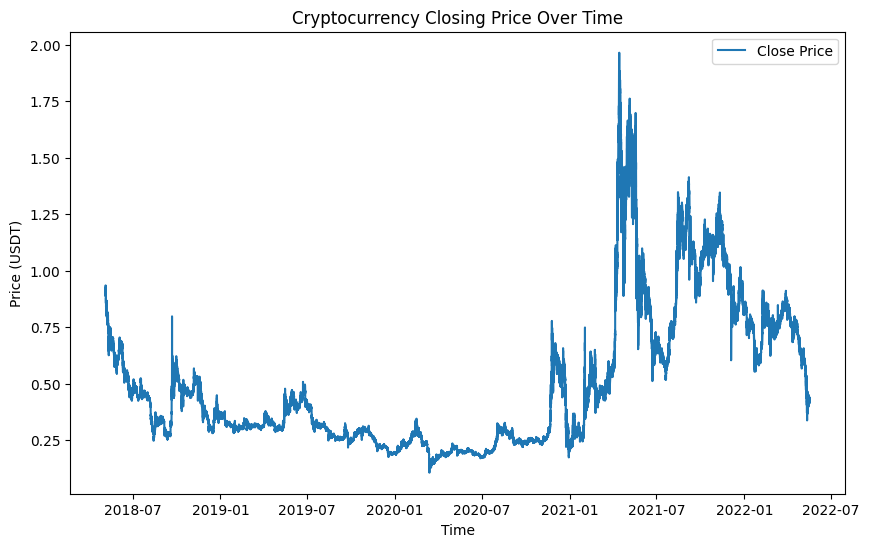

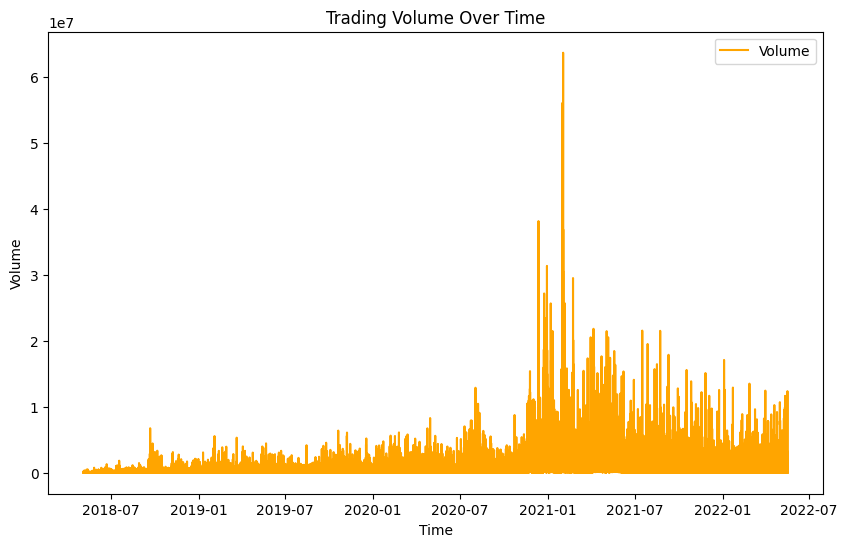

In [ ]:
import matplotlib.pyplot as plt

# Plot closing price over time
plt.figure(figsize=(10, 6))
plt.plot(train_data['timestamp'], train_data['close'], label='Close Price')
plt.xlabel('Time')
plt.ylabel('Price (USDT)')
plt.title('Cryptocurrency Closing Price Over Time')
plt.legend()
plt.show()

# Plot trading volume over time
plt.figure(figsize=(10, 6))
plt.plot(train_data['timestamp'], train_data['volume'], label='Volume', color='orange')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()


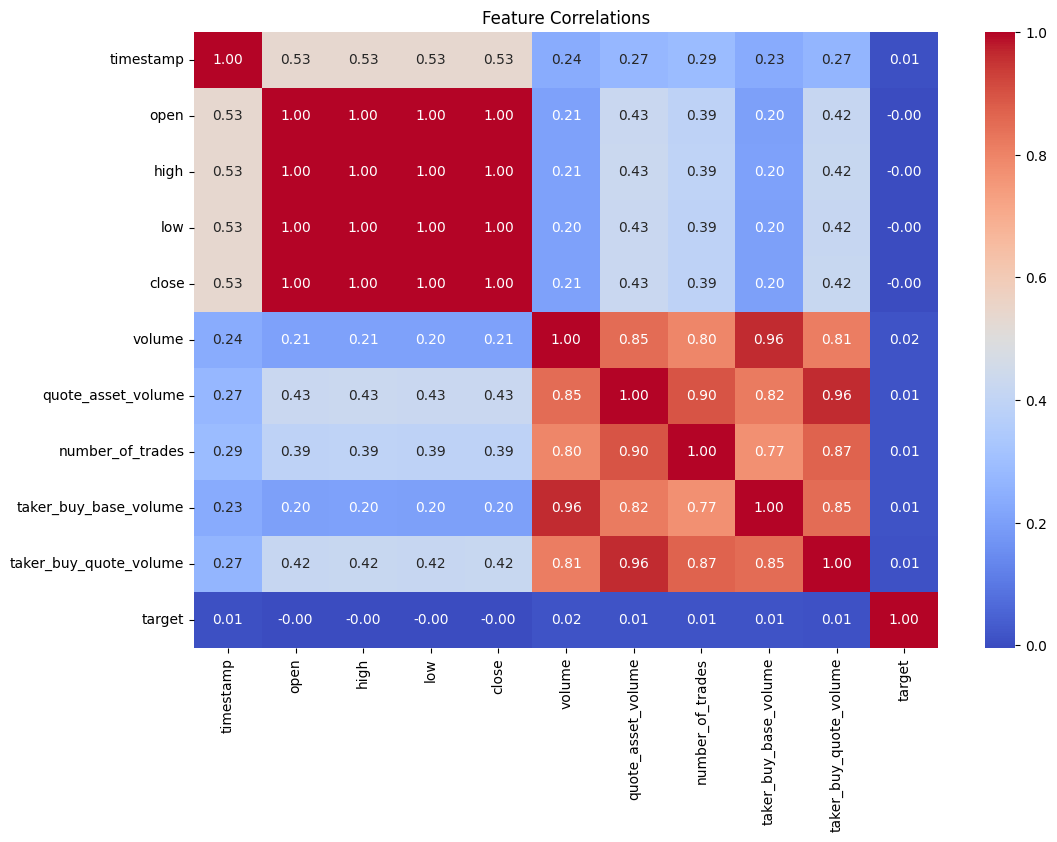

In [ ]:
import seaborn as sns

# Calculate correlations between numerical features
correlation_matrix = train_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()


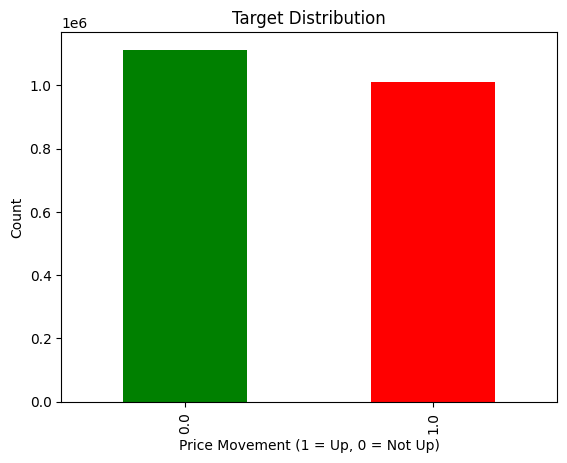

In [ ]:
# Plot the distribution of the target variable
train_data['target'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Target Distribution')
plt.xlabel('Price Movement (1 = Up, 0 = Not Up)')
plt.ylabel('Count')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122438 entries, 0 to 2122437
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   timestamp               int64  
 1   open                    float64
 2   high                    float64
 3   low                     float64
 4   close                   float64
 5   volume                  float64
 6   quote_asset_volume      float64
 7   number_of_trades        float64
 8   taker_buy_base_volume   float64
 9   taker_buy_quote_volume  float64
 10  target                  float64
dtypes: float64(10), int64(1)
memory usage: 178.1 MB


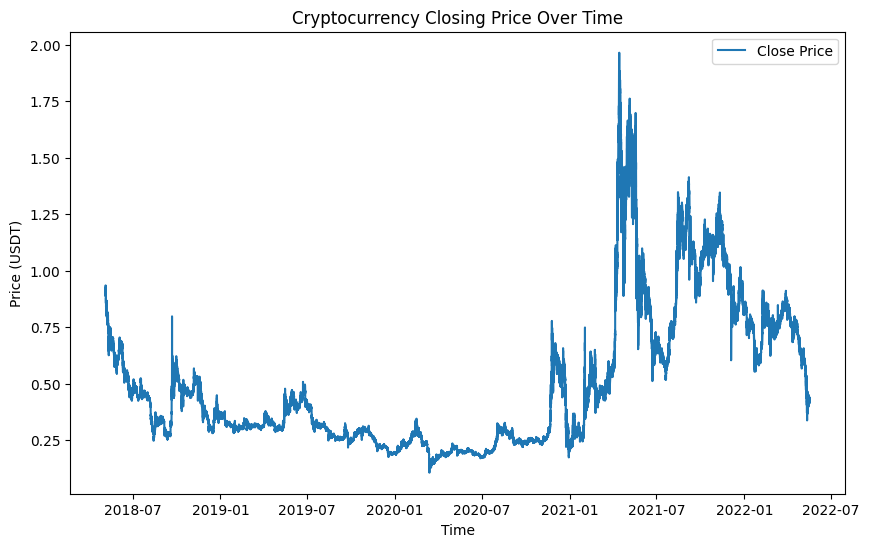

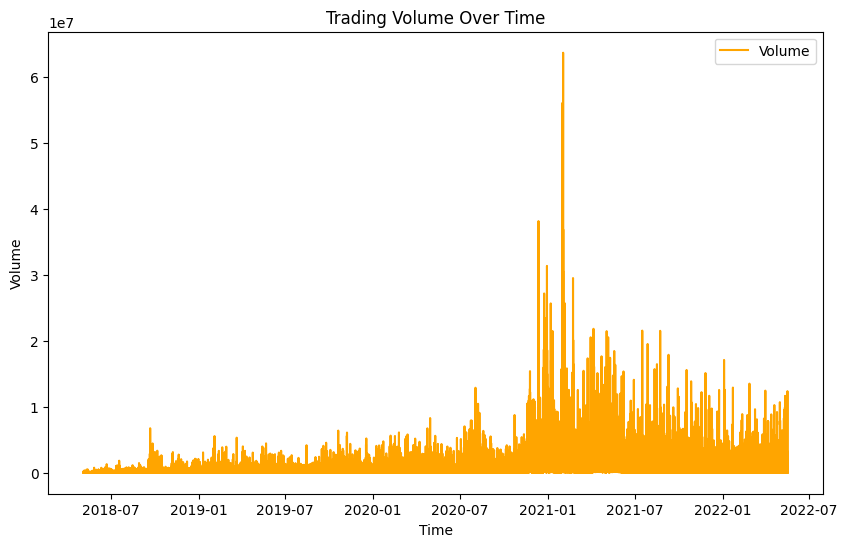

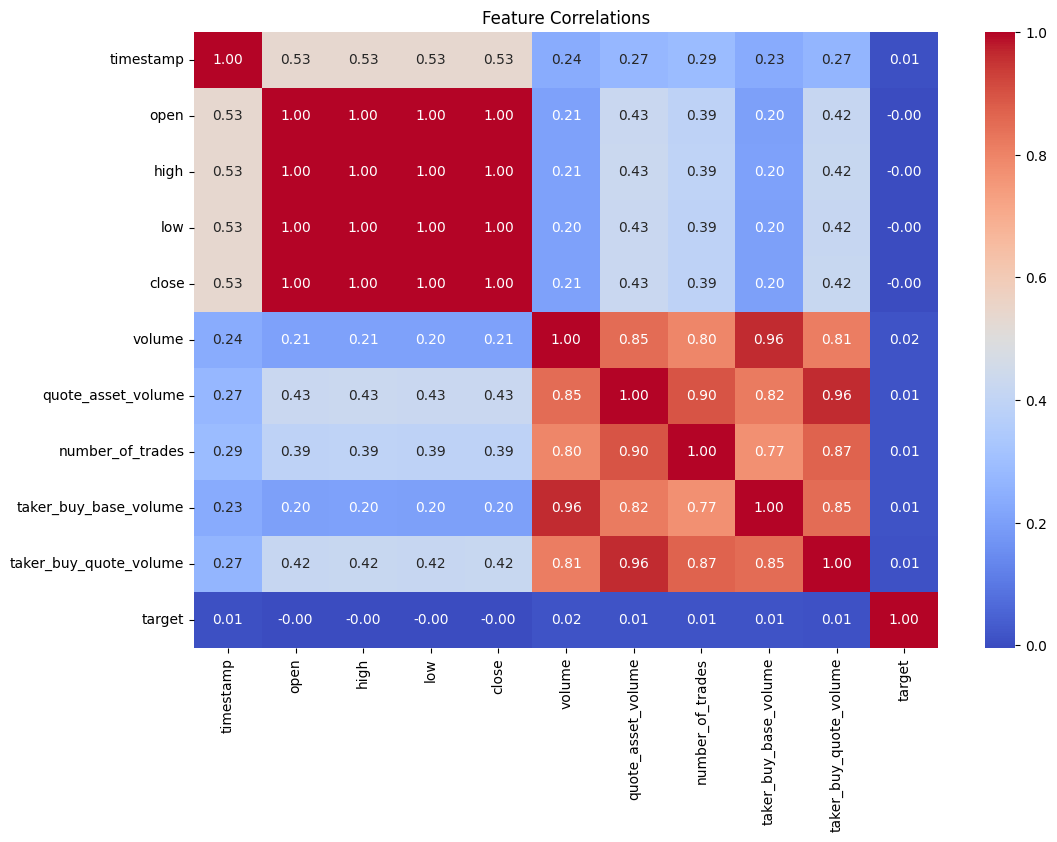

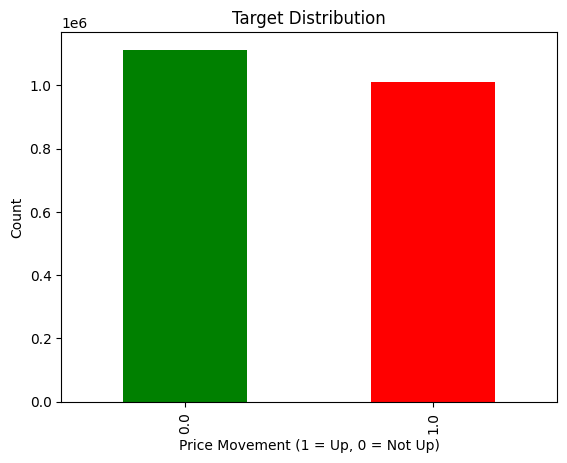

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
# Assuming you have already extracted the files from Google Drive
train_data = pd.read_csv('/content/crypto_data/train.csv')
test_data = pd.read_csv('/content/crypto_data/test.csv')

# Step 3: Check for missing values and data types
train_data.info()  # Shows data types and any missing values
train_data.describe()  # Summary statistics

# Step 4: Convert timestamp from Unix to datetime
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'], unit='s')
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'], unit='s')

# Step 5: Visualize closing price and volume over time
# Plot closing price over time
plt.figure(figsize=(10, 6))
plt.plot(train_data['timestamp'], train_data['close'], label='Close Price')
plt.xlabel('Time')
plt.ylabel('Price (USDT)')
plt.title('Cryptocurrency Closing Price Over Time')
plt.legend()
plt.show()

# Plot trading volume over time
plt.figure(figsize=(10, 6))
plt.plot(train_data['timestamp'], train_data['volume'], label='Volume', color='orange')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()

# Step 6: Correlation heatmap
correlation_matrix = train_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

# Step 7: Check the target distribution (1 = Price Up, 0 = Not Up)
train_data['target'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Target Distribution')
plt.xlabel('Price Movement (1 = Up, 0 = Not Up)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Step 1: Feature Engineering - Moving Averages
# 5-minute and 15-minute moving averages of the close price
train_data['MA_5'] = train_data['close'].rolling(window=5).mean()
train_data['MA_15'] = train_data['close'].rolling(window=15).mean()

# Step 2: Price Momentum (difference in price over the last minute)
train_data['momentum'] = train_data['close'] - train_data['close'].shift(1)

# Step 3: Volatility (Rolling Standard Deviation)
# Volatility based on the last 5 minutes
train_data['volatility'] = train_data['close'].rolling(window=5).std()

# Drop rows with NaN values generated from rolling operations
train_data = train_data.dropna()

# Verify the new features
train_data[['close', 'MA_5', 'MA_15', 'momentum', 'volatility']].head()


,close,MA_5,MA_15,momentum,volatility
14,0.89734,0.898742,0.899928,0.00000,0.001282
15,0.89735,0.898254,0.899665,0.00001,0.001248
16,0.89770,0.897858,0.899381,0.00035,0.000964
17,0.89734,0.897414,0.899111,-0.00036,0.000160
18,0.89576,0.897098,0.898736,-0.00158,0.000764


In [ ]:
from sklearn.model_selection import train_test_split

# Selecting the relevant features for the model
features = ['open', 'high', 'low', 'close', 'volume', 'MA_5', 'MA_15', 'momentum', 'volatility']
X = train_data[features]
y = train_data['target']

# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train and validation sets
X_train.shape, X_val.shape


((1697939, 9), (424485, 9))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_logreg = logreg.predict(X_val)

# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy: ", accuracy_score(y_val, y_pred_logreg))
print("\nClassification Report: \n", classification_report(y_val, y_pred_logreg))

# Confusion matrix for Logistic Regression
confusion_matrix(y_val, y_pred_logreg)


Logistic Regression Accuracy:  0.5253377622295252

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.53      0.98      0.68    222821
         1.0       0.51      0.02      0.04    201664

    accuracy                           0.53    424485
   macro avg       0.52      0.50      0.36    424485
weighted avg       0.52      0.53      0.38    424485



array([[219066,   3755],
       [197732,   3932]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reduce the number of trees to 50
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf.predict(X_val)

# Evaluate the Random Forest model
print("Random Forest Accuracy: ", accuracy_score(y_val, y_pred_rf))
print("\nClassification Report: \n", classification_report(y_val, y_pred_rf))

# Confusion matrix for Random Forest
confusion_matrix(y_val, y_pred_rf)


Random Forest Accuracy:  0.5184470593778343

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.54      0.61      0.57    222821
         1.0       0.49      0.41      0.45    201664

    accuracy                           0.52    424485
   macro avg       0.51      0.51      0.51    424485
weighted avg       0.52      0.52      0.51    424485



array([[136475,  86346],
       [118066,  83598]])

In [19]:
!pip install xgboost


In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the XGBoost model
print("XGBoost Accuracy: ", accuracy_score(y_val, y_pred_xgb))
print("\nClassification Report: \n", classification_report(y_val, y_pred_xgb))

# Confusion matrix for XGBoost
confusion_matrix(y_val, y_pred_xgb)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:13:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy:  0.5359129297855048

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.54      0.80      0.65    222821
         1.0       0.53      0.24      0.33    201664

    accuracy                           0.54    424485
   macro avg       0.53      0.52      0.49    424485
weighted avg       0.53      0.54      0.50    424485



array([[179195,  43626],
       [153372,  48292]])

In [21]:
# Function to calculate RSI
def compute_rsi(data, window=14):
    delta = data['close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Adding RSI to the training data
train_data['RSI'] = compute_rsi(train_data)

# Verify the new feature
train_data[['close', 'RSI']].tail()


,close,RSI
2122433,0.4304,27.272727
2122434,0.4305,30.232558
2122435,0.4309,36.170213
2122436,0.4306,34.693878
2122437,0.4301,32.075472


In [22]:
from sklearn.model_selection import cross_val_score

# Cross-validation for XGBoost
cv_scores = cross_val_score(xgb_model, X, y, cv=5)

print("Cross-validation scores: ", cv_scores)
print("Mean Cross-validation score: ", cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:14:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:15:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:15:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:15:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:15:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation scores:  [0.54094255 0.50395891 0.47865767 0.50528523 0.51820563]
Mean Cross-validation score:  0.509409999507937


In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Summary of model performance for comparison
models = ['Random Forest', 'XGBoost']
accuracies = [accuracy_score(y_val, y_pred_rf), accuracy_score(y_val, y_pred_xgb)]
f1_scores = [f1_score(y_val, y_pred_rf), f1_score(y_val, y_pred_xgb)]
precisions = [precision_score(y_val, y_pred_rf), precision_score(y_val, y_pred_xgb)]
recalls = [recall_score(y_val, y_pred_rf), recall_score(y_val, y_pred_xgb)]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'Precision': precisions,
    'Recall': recalls
})

# Display the comparison table
print(comparison_df)


           Model  Accuracy  F1 Score  Precision    Recall
0  Random Forest  0.518447  0.449926   0.491915  0.414541
1        XGBoost  0.535913  0.328985   0.525381  0.239468


In [26]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.1 MB/s eta 0:00:00


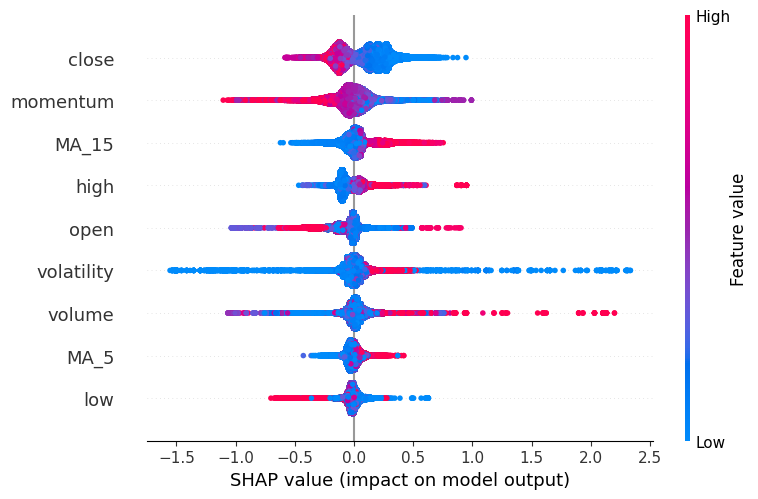

In [27]:
import shap

# Initialize the SHAP explainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_val)


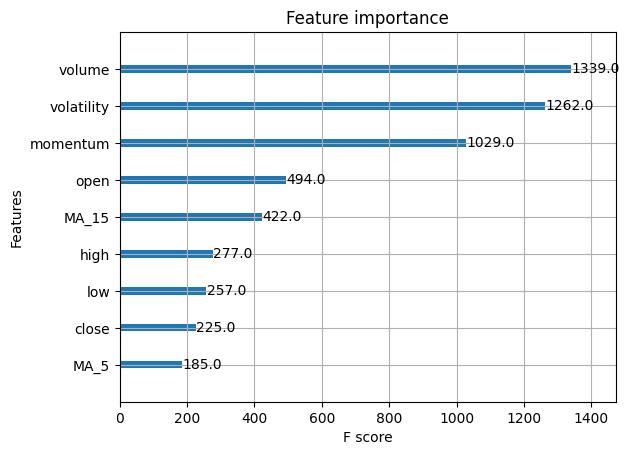

In [28]:
# Feature importance for XGBoost
xgb.plot_importance(xgb_model)
plt.show()


In [29]:
import joblib

# Save the model to a file
joblib.dump(xgb_model, 'xgboost_model.pkl')

# To load the model later
loaded_model = joblib.load('xgboost_model.pkl')
